<a href="https://colab.research.google.com/github/sshar180/Machine-Learning-/blob/main/ANN_Multilayer_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview 
In this assignment you will implement a two-layer neural network. You will implement the loss functions, gradients, optimizers to train the network and test its performance on MNIST dataset. 

For this assignment we will use the functionality of Pandas (https://pandas.pydata.org/), Matplotlib (https://matplotlib.org/), and Numpy (http://www.numpy.org/). 

If you are asked to **implement** a particular functionality, you should **not** use an existing implementation from the libraries above (or some other library that you may find). When in doubt, please ask. 

Before you start, make sure you have installed all those packages in your local Jupyter instance

## Read *all* cells carefully and answer all parts (both text and missing code)

You will complete all the code marked `TODO` and answer descriptive/derivation questions 



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# make sure you import here everything else you may need

### Load MNIST Dataset 

For this assignment, we will use [MNIST](https://en.wikipedia.org/wiki/MNIST_database) handwritten digits data set. The dataset consists 10 handwritten digits (0,1,...,9). It is a widely used dataset to demonstrate simple image classification problem.

MNIST dataset is publicly available from different sources. We will be using MNIST from Keras package. If you do not have Keras installed, you can find the installation guide [here](https://www.tutorialspoint.com/keras/keras_installation.htm). 

In short, you need to run ```conda install -c anaconda keras``` or ```pip install keras```

The training data consists of 60000 images of size $28 \times 28$ pixels; the test data consists of 10000 images.

11490434/11490434 [==============================] - 0s 0us/step
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


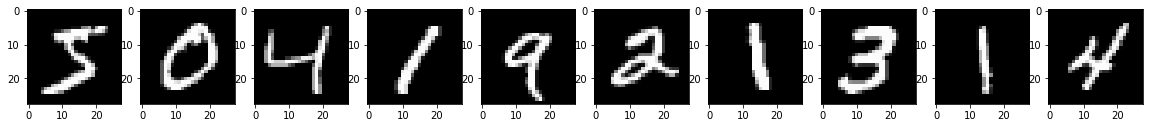

In [ ]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('Training data shape:',x_train.shape)
print('Test data shape:',x_test.shape)

n_img=10
plt.figure(figsize=(n_img*2,2))
plt.gray()
for i in range(n_img):
    plt.subplot(1,n_img,i+1)
    plt.imshow(x_train[i])
plt.show()

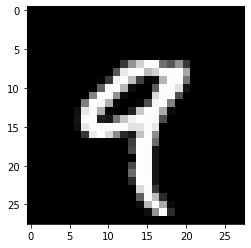

In [ ]:
 plt.imshow(x_train[4])

In [ ]:
y_train[4]

9

We will be vectorizing the training and test images. So, the size of each vector will be 784.

In [ ]:
x_train=x_train.reshape(x_train.shape[0],-1)
x_test=x_test.reshape(x_test.shape[0],-1)

print('Training data shape after reshaping:',x_train.shape)
print('Test data shape after reshaping::',x_test.shape)

Training data shape after reshaping: (60000, 784)
Test data shape after reshaping:: (10000, 784)


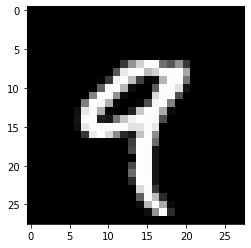

In [ ]:
p = x_train.reshape(x_train.shape[0],28,28)
plt.imshow(p[4])

## Question 1: Binary classification using neural network [45 pts]

We will start with classification of images for two different digits using a two-layer network with a cross entropy loss. 

In the next question, we will extend the same architecture to multi-class classification. 

Pick any two digits out of ten for our classification (say 5 and 8), which we will assign label "0" or "1". 

Pick same number of images from each class for training and create arrays for input and output (say 1000). 

```
# train_x -- N x 784 array of training input
# train_y -- N x 1 array of binary labels 
```  

If you use 1000 images from each class N = 2000. You can increase the number of training samples if you like. It is just a suggestion. 


We also need to transpose the dimension of the data so that their size becomes $784\times N$. It will be helpful to feed it to our model based on our notations.


In [ ]:
def extract_binary_classification_dataset(x, y, label1, label2, num_samples):
    """Make a subset dataset from MNIST, containing only 2 classes for binary classification task 
    Args:
        x (numpy.ndarray): data, can be x_train or x_test
        y (numpy.ndarray): labels of data, can be y_train or y_test
        label1 (int): the first class you pick, e.g. 5
        label2 (int): the second class you pick, e.g. 8
        num_samples (int): the number of images you select for each class, e.g. 1000
    Returns:
        x_ (numpy.ndarray): the data for 2 picked classes
        y_ (numpy.ndarray): the corresponding labels for 2 picked classes
    """
    # for class 1
    x1 = x[y == label1]
    x1 = x1[:num_samples]
    y1 = np.zeros(len(x1))

    # for class 2
    x2 = x[y == label2]
    x2 = x2[:num_samples]
    y2 = np.ones(len(x2))

    # combine 2 classes
    x_ = np.concatenate((x1,x2),axis=0)
    y_ = np.concatenate((y1,y2),axis=0)
    return x_, y_


# Pick your own digits
label1 = 5
label2 = 8
num_samples = 1000

# Train & test data
train_x, train_y = extract_binary_classification_dataset(x_train, y_train, label1, label2, num_samples)
test_x, test_y = extract_binary_classification_dataset(x_test, y_test, label1, label2, num_samples)

# reshape data 
train_x = train_x.T
test_x = test_x.T
print("Training data shape:", train_x.shape)
print("Test data shape:", test_x.shape)

Training data shape: (784, 2000)
Test data shape: (784, 1866)


In [ ]:
vk = train_x.T

In [ ]:
train_y.shape

(2000,)

In [ ]:

# plt.figure(figsize=(n_img*2,2))
# plt.imshow(vk[7])

### Network Architecture

We will be using a two layer neural network in our experiment. The input layer will have 784 nodes, the hidden layer will have 256 nodes and the output layer will have 1 node. Each node will have $\textit{sigmoid}$ activation function.

The equations for feedforward operation will be the following:

$$\mathbf{z}^{(1)}=W^{(1)} \mathbf{x}+ \mathbf{b}^{(1)}\\\mathbf{y}^{(1)}=\varphi(\mathbf{z}^{(1)})\\\mathbf{z}^{(2)}=W^{(2)}  \mathbf{y}^{(1)}+ \mathbf{b}^{(2)} \\\mathbf{y}^{(2)}=\varphi(\mathbf{z}^{(2)})$$

where $\mathbf{x}\in \mathbb{R}^{784}$ is the input layer, $\mathbf{y}^{(1)}\in \mathbb{R}^{256}$ is the hidden layer, $\mathbf{y}^{(2)} \in \mathbb{R}$ is the output layer, $W^{(1)}\in \mathbb{R}^{256\times 784}$ is the first layer weights, $W^{(2)}\in \mathbb{R}^{1\times 256}$ is the second layer weights, $\mathbf{b}^{(1)}\in \mathbb{R}^{256}$ is the first layer bias, $\mathbf{b}^{(2)}\in \mathbb{R}$ is the second layer bias, $\varphi(\cdot)$ is the activation function.

### Network initialization [5 pts]

We initialize the weights for $W^{(1)}$ and $W^{(2)}$ with random values drawn from normal distribution with zero mean and 0.01 standard deviation. We will initialize bias vectors $\mathbf{b}^{(1)}$ and $\mathbf{b^{(2)}}$ with zero values. 

We can fix the seed for random initialization for reproducibility.

In [ ]:
def TwoLayerNetwork(layer_dims=[784,256,1]):
    # Fix the seed
    np.random.seed(3)

    # TODO 
    # Your code goes here
    input_layer =  layer_dims[0]
    hidden_layer1= layer_dims[1]
    output_layer = layer_dims[2]

    params ={
       'W1' : np.random.normal(0, 0.01, (hidden_layer1, input_layer)),
       'b1' : np.zeros((hidden_layer1, 1)),
       'W2' : np.random.normal(0, 0.01, (output_layer, hidden_layer1)),
       'b2' : np.zeros((output_layer,1)),
        }
    
    return params

In [ ]:
val = TwoLayerNetwork()
val['b1'].shape


(256, 1)

### Sigmoid activation function 
Now we will write the sigmoid activation function as 

$$ \varphi(z) = \frac{1}{1+e^{-z}}$$

Note that derivative of __sigmoid__ is $\varphi'(z) = \varphi(z) (1-\varphi(z))$. 

In [ ]:
def sigmoid(Z):
    # Input: Z -- numpy.ndarray
    # TODO 
    # Write your function
    Y = 1/(1+np.exp(-Z))
    return Y

### Cross entropy loss function [5 pts]
We will minimize the binary cross entropy loss function. You will use the true labels and predicted labels of a batch of N samples. 

Binary crossentropy loss for $i^{th}$ sample can be written as 

$$Loss_i = -y_i \log y^{(2)}_i- (1-y_i) \log (1-y^{(2)}_i)$$

where $y_i$ is the true label. We can find the average loss for a batch of N samples as $Loss=\frac{1}{N}\sum_{i=1}^{N} Loss_i$.

Note that the gradient of the cross entropy loss w.r.t. the output is 

$$ \nabla_{y^{(2)}} Loss_i = -\frac{y_i}{y_i^{(2)}} + \frac{1-y_i}{1-y_i^{(2)}} = \frac{y_i^{(2)}-y_i}{y_i^{(2)}(1-y_i^{(2)})}.$$

We can also show that $$\delta^{(2)} = \nabla_{\mathbf{z}^{(2)}} Loss_i  = \nabla_{y^{(2)}} Loss_i \odot \varphi'(\mathbf{z})= y_i^{(2)}-y_i,$$ 
where $\odot$ denotes element-wise multiplication of the arrays. 

In [ ]:
def CrossEntropyLoss(Y_true, Y2):
    # TODO 
    # Write your code here
    m = Y_true.shape[0]
    loss = np.dot(Y_true,(np.log(Y2)).T) + np.dot((1-Y_true),np.log((1-Y2)).T)
    loss = -loss/m
    loss = float(np.squeeze(loss))
    return loss

### Forward propagation  [5 pts]
Next, we will write the code for the forward pass for two layer network. Each layer consists of an affine function (fully-connected layer) followed by an activation function. You wil also return the intermediate results ($\mathbf{x}, \mathbf{z}^{(1)}, \mathbf{y}^{(1)}, \mathbf{z}^{(2)}$) in addition to final output ($\mathbf{y}^{(2)}$). You will need the intermediate outputs for the backpropagation step.

In [ ]:
def forward(X, params):
    
    # TODO 
    # Write your codes here

    # X -- 784 x N array 
    # params -- 
      # W1 -- 256 x 784 matrix
      # b1 -- 256 x 1 vector
      # W2 -- 1 x 256 matrix
      # b2 -- 1 x 1 scalar 
    # Y2 -- 1 x N output 
    # intermediate -- X, Z1, Y1, Z2 
      # Z1 -- 256 x N matrix
      # Y1 -- 256 x N matrix
      # Z2 -- 1 x N array

      W1 = params['W1']
      b1 = params['b1']
      W2 = params['W2']
      b2 = params['b2']

      Z1 = np.dot(W1,X) + b1
      Y1 = sigmoid(Z1)
      Z2 = np.dot(W2,Y1) + b2
      Y2 = sigmoid(Z2)

      intermediate = {
          'X':X,
          'Z1':Z1,
          'Y1':Y1,
          'Z2':Z2
      }
      return Y2, intermediate

### Backpropagration step [10 pts]
Now we will implement the backpropagation step for the two layer neural network. 

You will need the gradient of the Loss w.r.t. $W^{(l)},\mathbf{b}^{(l)}$ for $l = 1,2$ for all the training samples.  



We saw that we can write the gradient of Loss with respect to $W^{(l)}, \mathbf{b}^{(l)}$ for a single sample as

$$\nabla_{W^{(l)}} Loss_i = \delta^{(l)} \mathbf{y}^{(l-1)T},$$  
$$\nabla_{\mathbf{b}^{(l)}} Loss_i = \delta^{(l)},$$

where 
$$\delta^{(l)} = \nabla_{\mathbf{z}^{(l)}} Loss_i = \nabla_{\mathbf{y}^{(l)}} Loss_i \odot \varphi'(\mathbf{z}^{(l)}).$$ 


For the the last layer, we can compute $\delta^{(L)}$ by plugging the value of $\nabla_{\mathbf{y}^{(L)}} Loss$ as described above. 

For the intermediate layers $l<L$, we can write 
$$\delta^{(l)} = W^{(l+1)T}\delta^{(l+1)} \odot \varphi'(\mathbf{z}^{(l)}).$$ 



**Once we have the gradients $\nabla_{W^{(l)}} Loss_i, \nabla_{\mathbf{b}^{(l)}} Loss_i$ for all $i$. We can compute their average to compute the gradient of the total loss function $\frac{1}{N} \sum_{i=1}^N Loss_i$ as**

$$\nabla_{W^{(l)}} Loss = \frac{1}{N} \sum_i \nabla_{W^{(l)}} Loss_i, $$
$$ \nabla_{\mathbf{b}^{(l)}} Loss = \frac{1}{N} \sum_i  \nabla_{\mathbf{b}^{(l)}} Loss_i.$$

**Please refer to the slides and lectures for more details.**

In [ ]:
def backward(Y_true, Y2, intermediate, params):
    
    # Inputs: 
      # Y_true -- 1 x N true labels
      # Y2 -- 1 x N output of the last layer
      # intermediate -- X, Z1, Y1, Z2 
      # params -- W1, b1, W2, b2 
    
    # Outputs: 
      # grads -- [grad_W1, grad_b1, grad_W2, grad_b2]
    
    # TODO 
    # Write your codes here

    W1 = params['W1']
    W2 = params['W2']

    Y1 = intermediate['Y1']
    X = intermediate['X']
    Z1 = intermediate['Z1']

    # m = X.shape[1] # m = 2000
    m = 1
    dif = Y2 - Y_true
    grad_W2 = (1/m) * np.dot(dif,Y1.T)
    grad_b2 = (1/m) * np.sum(dif,axis=1, keepdims=True)

    # dff2 = np.dot(W2.T, dif) * (1 - np.power(Y1, 2))
    dff2 = np.dot(W2.T, dif) * (sigmoid(Z1) * (1 - sigmoid(Z1)))

    grad_W1 = (1/m) * np.dot(dff2, X.T)
    grad_b1 = (1/m) * np.sum(dff2, axis=1, keepdims=True)

    grads = {"grad_W1": grad_W1,
             "grad_b1": grad_b1,
             "grad_W2": grad_W2,
             "grad_b2": grad_b2}

    return grads

### Optimizer [5 pts]
We will use a standard gradient descent-based optimizer to minimize the loss function. You have already implemented gradient descent in HW2. You may have to adjust learning rate that provides you best training/validation performance. In this exercise, we are not using validation data; in practice, you should use it to tune your hyperparameters such as learning rate, network architecture etc.

You can use same learning rate for all weights in this assignment. 

You should update $W^1, \mathbf{b}^1, W^2, \mathbf{b}^2$ as 
$$ W^1 \gets W^1 - \alpha \nabla_{W^1} Loss $$
$$ \mathbf{b}^1 \gets \mathbf{b}^1 - \alpha \nabla_{\mathbf{b}^1} Loss $$ 
$$ W^2 \gets W^2 - \alpha \nabla_{W^2} Loss $$ 
$$ \mathbf{b}^2 \gets \mathbf{b}^2 - \alpha \nabla_{\mathbf{b}^2} Loss $$ 
$\alpha$ is the learning rate. 

In [ ]:
def GD(params, grads, learning_rate):
    
    # updated params = old params - learning rate * gradient of Loss computed at old params
    # TODO 
    # Write your codes here
     # Retrieve each parameter from the dictionary "params"
    W1 = params['W1']
    b1 = params['b1']
    W2 = params['W2']
    b2 = params['b2']

    # Retrieve each gradient from the dictionary "grads"
    grad_W1 = grads['grad_W1']
    grad_b1 = grads['grad_b1']
    grad_W2 = grads['grad_W2']
    grad_b2 = grads['grad_b2']

    # Update rule for each parameter
    W1 = W1 - learning_rate*grad_W1
    b1 = b1 - learning_rate*grad_b1
    W2 = W2 - learning_rate*grad_W2
    b2 = b2 - learning_rate*grad_b2

    params = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
                        
    return params

### Train the Model [5 pts]
We will train the model using the functions we wrote above. 

First, we specify the number of nodes in the layers, number of epochs and learning rate. Then we initialize the network.

In [ ]:
layer_dims = [train_x.shape[0],256,1]
epochs = 100
lr = 0.00001

params = TwoLayerNetwork(layer_dims)

Then we train the network for the number of epochs specified above. In every epoch, we will do the following:
1. Calculate the forward pass to get estimated labels.
2. Use the estimated labels calculate loss. We will be recording loss for every epoch.
3. Use backpropagation to calculate gradients.
4. Use gradient descent to update the weights and biases.

You should store the loss value after every epoch in an array ```loss_history```  and print the loss value after every few epochs (say 20). 


In [ ]:
# TODO 
# Write your codes here
Cost_per_Epoch = []
for i in range(0, epochs):
         
        # Forward propagation. Inputs: "train_x, params" and Outputs: "Y2, intermediate".
        Y2, intermediate = forward(train_x, params)
        
        # Cost function. Inputs: "train_y, Y2, parameters". Outputs: "cost".
        cost = CrossEntropyLoss(train_y, Y2[0])
        Cost_per_Epoch.append(cost)
 
        # Backpropagation. Inputs: "train_y, Y2, intermediate, params". Outputs: "grads".
        grads = backward(train_y, Y2, intermediate, params)
 
        # Gradient descent parameter update. Inputs: "params, grads,l r". Outputs: "params".
        params = GD(params, grads, lr)

        # Print the cost for every iterations
        print("Cost after iteration %i: %f" %(i, cost))
 

Cost after iteration 0: 0.691340
Cost after iteration 1: 0.672342
Cost after iteration 2: 0.656256
Cost after iteration 3: 0.640605
Cost after iteration 4: 0.624871
Cost after iteration 5: 0.609149
Cost after iteration 6: 0.593113
Cost after iteration 7: 0.576539
Cost after iteration 8: 0.559499
Cost after iteration 9: 0.542371
Cost after iteration 10: 0.524982
Cost after iteration 11: 0.507521
Cost after iteration 12: 0.490128
Cost after iteration 13: 0.472892
Cost after iteration 14: 0.455958
Cost after iteration 15: 0.439394
Cost after iteration 16: 0.423240
Cost after iteration 17: 0.407555
Cost after iteration 18: 0.392382
Cost after iteration 19: 0.377890
Cost after iteration 20: 0.364140
Cost after iteration 21: 0.350387
Cost after iteration 22: 0.337798
Cost after iteration 23: 0.325879
Cost after iteration 24: 0.314708
Cost after iteration 25: 0.303992
Cost after iteration 26: 0.294039
Cost after iteration 27: 0.284477
Cost after iteration 28: 0.275476
Cost after iteration 29:

Now we will plot the recorded loss values vs epochs. We will observe the training loss decreasing with the epochs.

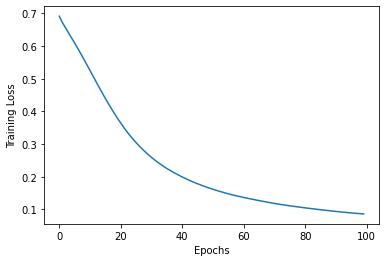

In [ ]:
plt.figure()
plt.plot(Cost_per_Epoch)
plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.show()

### Evaluation on test data [5 pts]

Now we will be evaluating the accuracy we get from the trained model. We feed training data and test data to the forward model along with the trained parameters. 

Note that, we need to covert the output probability of the forward pass to binary labels before evaluating accuracy. Since the model provides the posterior probability $p(y = 1 | x)$ in range [0,1]. We can binarize them using 0.5 as a theshold (i.e. if $y_i^{(2)}\geq 0.5$, $y_i^{(2)} \gets 1$ otherwise  $y_i^{(2)} \gets 0$).

In [ ]:
# TODO 

def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    A2, cache = forward(X, parameters)
    threshold = 0.5 
    p = (A2 > threshold)
    
    return p

predictions_test = predict(params, test_x)
predictions_train = predict(params, train_x)

print("Training accuracy:",float((np.dot(train_y,predictions_train.T) + np.dot(1-train_y,1-predictions_train.T))/float(train_y.size)*100))
print("Test accuracy:",float((np.dot(test_y,predictions_test.T) + np.dot(1-test_y,1-predictions_test.T))/float(test_y.size)*100))

# cross-check Using Sklearn 
from sklearn.metrics import accuracy_score
print("Training accuracy:",accuracy_score(train_y,predictions_train[0])*100)
print("Test accuracy:",accuracy_score(test_y,predictions_test[0])*100)


Training accuracy: 98.25
Test accuracy: 95.12325830653805
Training accuracy: 98.25
Test accuracy: 95.12325830653805


### Visualize some of the correct/miscalassified images [5 pts]

Now we will look at some images from training and test sets that were misclassified. 

Training set. 
Pick 5 images from each class that are correcly and incorreclty classified. 
True/False Positive/Negatives

Test set. 
Pick 5 images from each class that are correcly and incorreclty classified. 
True/False Positive/Negatives


Training set examples for true/false positive/negative
Training set negative examples
Predicted Value 0.0 Predicted Label: 5 True Value 1.0  True Label: 8 Index 1041
Predicted Value 0.0 Predicted Label: 5 True Value 1.0  True Label: 8 Index 1125
Predicted Value 0.0 Predicted Label: 5 True Value 1.0  True Label: 8 Index 1237
Predicted Value 0.0 Predicted Label: 5 True Value 1.0  True Label: 8 Index 1242
Predicted Value 0.0 Predicted Label: 5 True Value 1.0  True Label: 8 Index 1247


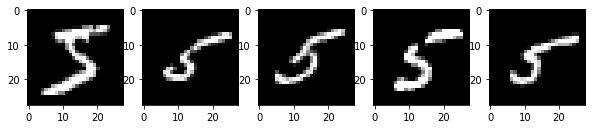

Training set positive examples
Predicted Value 1.0 Predicted Label: 5 True Value 1.0  True Label: 5 Index 1000
Predicted Value 1.0 Predicted Label: 5 True Value 1.0  True Label: 5 Index 1001
Predicted Value 1.0 Predicted Label: 5 True Value 1.0  True Label: 5 Index 1002
Predicted Value 1.0 Predicted Label: 5 True Value 1.0  True Label: 5 Index 1003
Predicted Value 1.0 Predicted Label: 5 True Value 1.0  True Label: 5 Index 1004


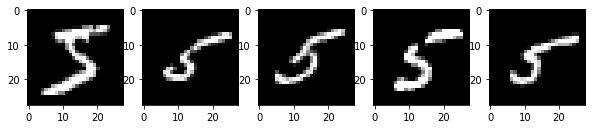

In [ ]:
# TODO 
# Training set
print("Training set examples for true/false positive/negative")
Y_hat, caches = forward(train_x, params)

# your code goes here...
predict = (Y_hat > .5)*1.0
a=predict[0]
b=train_y
false_prediction = np.where(np.logical_and(a ==0 ,b==1))[0]

train_x.shape
p = train_x.T
p = p.reshape(p.shape[0],28,28)
print("Training set negative examples")
for x in range(0,5):
  index = false_prediction[x]
  # plt.imshow(p[index])
  print("Predicted Value", a[index],"Predicted Label: 5","True Value",b[index]," True Label: 8", "Index", index)

n_img=5
plt.figure(figsize=(n_img*2,2))
plt.gray()
for i in range(n_img):
  index = false_prediction[i]
  plt.subplot(1,n_img,i+1)
  plt.imshow(p[i])
plt.show()  

# Positive Predictions
print("Training set positive examples")
true_prediction = np.where(np.logical_and(a ==1 ,b==1))[0]
for x in range(0,5):
  index = true_prediction[x]
  # plt.imshow(p[index])
  print("Predicted Value", a[index],"Predicted Label: 5","True Value",b[index]," True Label: 5", "Index", index)

n_img=5
plt.figure(figsize=(n_img*2,2))
plt.gray()
for i in range(n_img):
  index = true_prediction[i]
  plt.subplot(1,n_img,i+1)
  plt.imshow(p[i])
plt.show()  


 

In [ ]:
a=predict[0]
b=train_y
t = np.where(np.logical_and(a ==0 ,b==1))[0]

In [ ]:
accuracy_score(train_y,predict[0])*100

98.25

In [ ]:
x_train.shape

(60000, 784)

In [ ]:
train_x.shape
p = train_x.T

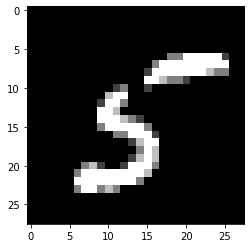

In [ ]:
train_y[1041]
predict[0][1041]
p = p.reshape(p.shape[0],28,28)
plt.imshow(p[3])

In [ ]:
train_x.shape

(784, 2000)

In [ ]:
t

array([1041, 1125, 1237, 1242, 1247, 1250, 1251, 1256, 1293, 1436, 1477,
       1478, 1517, 1556, 1607, 1630, 1668, 1730, 1840, 1870, 1914, 1916,
       1939])

Test set examples for true/false positive/negative
Training set negative examples
Predicted Value 0.0 Predicted Label: 5 True Value 1.0  True Label: 8 Index 936
Predicted Value 0.0 Predicted Label: 5 True Value 1.0  True Label: 8 Index 953
Predicted Value 0.0 Predicted Label: 5 True Value 1.0  True Label: 8 Index 959
Predicted Value 0.0 Predicted Label: 5 True Value 1.0  True Label: 8 Index 962
Predicted Value 0.0 Predicted Label: 5 True Value 1.0  True Label: 8 Index 965


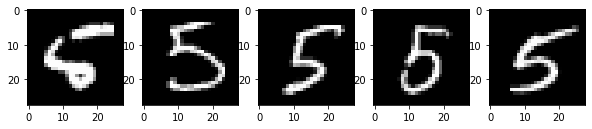

Training set positive examples
Predicted Value 1.0 Predicted Label: 5 True Value 1.0  True Label: 5 Index 892
Predicted Value 1.0 Predicted Label: 5 True Value 1.0  True Label: 5 Index 893
Predicted Value 1.0 Predicted Label: 5 True Value 1.0  True Label: 5 Index 894
Predicted Value 1.0 Predicted Label: 5 True Value 1.0  True Label: 5 Index 895
Predicted Value 1.0 Predicted Label: 5 True Value 1.0  True Label: 5 Index 896


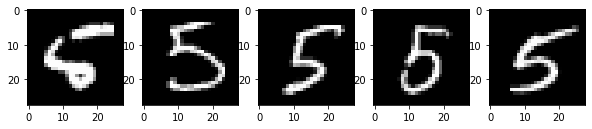

In [ ]:
# Test set
print("Test set examples for true/false positive/negative")
Y_hat, caches = forward(test_x, params)

# your code goes here...
predict = (Y_hat > .5)*1.0
a=predict[0]
b=test_y
false_prediction = np.where(np.logical_and(a ==0 ,b==1))[0]

# train_x.shape
p = test_x.T
p = p.reshape(p.shape[0],28,28)
print("Training set negative examples")
for x in range(0,5):
  index = false_prediction[x]
  # plt.imshow(p[index])
  print("Predicted Value", a[index],"Predicted Label: 5","True Value",b[index]," True Label: 8", "Index", index)

n_img=5
plt.figure(figsize=(n_img*2,2))
plt.gray()
for i in range(n_img):
  index = false_prediction[i]
  plt.subplot(1,n_img,i+1)
  plt.imshow(p[i])
plt.show()  

# Positive Predictions
print("Training set positive examples")
true_prediction = np.where(np.logical_and(a ==1 ,b==1))[0]
for x in range(0,5):
  index = true_prediction[x]
  # plt.imshow(p[index])
  print("Predicted Value", a[index],"Predicted Label: 5","True Value",b[index]," True Label: 5", "Index", index)

n_img=5
plt.figure(figsize=(n_img*2,2))
plt.gray()
for i in range(n_img):
  index = true_prediction[i]
  plt.subplot(1,n_img,i+1)
  plt.imshow(p[i])
plt.show()  
 



---



## Question 2. Multiclass classification [35 pts] 

Now we will build a classifier to separate all the digits. For this purpose, we will only change the last layer and the loss. 


Instead of using a single output, we will provide 10 outputs; and instead of using a binary cross entropy loss, we will use mutli-class cross entropy loss. 

In multinomal logistic regression (aka softmax regression), we define the posterior probability of label $y \in \{0,\ldots, K-1\}$ as 


$$p(y = c | \mathbf{x}) = \frac{\exp(\mathbf{w}_c^T\mathbf{x})}{\sum_{k=1}^K \exp(\mathbf{w}_k^T\mathbf{x})} = \mathbf{p}_c.$$ 

In other words, last layer of the network provides a probability vector $\mathbf{p} \in \mathbb{R}^K$, such that each $0 \le \mathbf{p}_c \le 1$ and $\sum_c \mathbf{p}_c = 1$. 

### Softmax function [5 pts]

Let us first define the softmax function, which is a multinomal extension of the sigmoid function that maps a vector of length $K$ to a probability vector. 

We can define ```softmax``` function on a vector $\mathbf{z} \in \mathbb{R}^K$ as $\mathbf{p} = \text{softmax}(\mathbf{z})$: 

$$\mathbf{p}_c(\mathbf{z}) = \frac{\exp(\mathbf{z}_c)}{\sum_{k=1}^K \exp(\mathbf{z}_k)}$$



In [ ]:
def softmax(Z):
    # Z -- K x N numpy.ndarray, K is the number of classes, N is the number of samples
    # TODO  
    # your code goes here... 

      exp =   np.exp(Z)
      probs = exp/np.sum(exp,axis=0,keepdims=True)
      return probs

We have to note that the numerical range of floating point numbers in numpy is limited. For `float64` the upper bound is $10^{308}$. For exponential, its not difficult to overshoot that limit, in which case python returns `nan`.

To make our softmax function numerically stable, we simply normalize the values in the vector, by multiplying the numerator and denominator with a constant `C` as

\begin{align*}
\mathbf{p}_c  &= \frac{\exp(\mathbf{z}_c)}{\sum_{k=1}^K \exp(\mathbf{z}_k)} \\
& = \frac{C\exp(\mathbf{z}_c)}{C\sum_{k=1}^K \exp(\mathbf{z}_k)}\\
& = \frac{\exp(\mathbf{z}_c + \log C)}{\sum_{k=1}^K \exp(\mathbf{z}_k + \log C)}.
\end{align*}

We can choose an arbitrary value for `log(C)` term, but generally `log(C) = −max(z)` is chosen


In [ ]:
def stable_softmax(Z): 
    # Z -- K x N numpy.ndarray, K is the number of classes, N is the number of samples
    # TODO (this is optional)
    # your code goes here  
    probs = (np.exp(Z - np.max(Z)) / np.exp(Z - np.max(Z)).sum())
    return probs

### Derivative of the softmax function

We can show that the derivative of the __softmax__ function with respect to any input can be written as 

$$ \frac{\partial \mathbf{p}_i}{\partial \mathbf{z}_j} = \begin{cases} \mathbf{p}_i(1-\mathbf{p}_j) & i = j \\ \mathbf{p}_i (-\mathbf{p}_j) & i \ne j. \end{cases}$$

[More info here](https://deepnotes.io/softmax-crossentropy)


### Multiclass cross entropy loss function [5 pts]

We will minimize the cross entropy loss. You will use the true labels and predicted labels of a batch of N samples. 

The multi-class cross entropy loss for $i^{th}$ sample can be written as 
$$Loss_i = -\sum_c \mathbf{1}(y_i = c) \log \mathbf{p}_c $$
where $y_i$ is the true label and 

$$\mathbf{1}(y_i = c) = \begin{cases} 1 & y_i =c \\ 0 & \text{otherwise} \end{cases}$$ 
is an indicator function. 

We can find the average loss for a batch of N samples as $Loss=\frac{1}{N}\sum_{i=1}^{N} Loss_i$. 


In [ ]:
def MultiClassCrossEntropyLoss(Y_true, probs):
  
  # TODO 
  # Write your code here

  # probs -- K x N array
  # Y_true -- 1 x N array 
  # loss --  sum Loss_i over N samples 
  m= Y_true.shape[1]
  loss = -(1/m) * np.sum(Y_true * np.log(probs))

  return loss

### Derivative of the cross entropy loss 

Let us assume that $\mathbf{p} = \text{softmax}(\mathbf{z})$. 

Note that the derivative of the loss w.r.t. $\mathbf{p}_j$ can be written as 
$$\frac{\partial Loss_i }{\partial \mathbf{p}_j} = \begin{cases} -1/\mathbf{p}_j & j = y_i \\ 0 & j \ne y_i \end{cases}. $$

Note that we can use _total derivative_ to compute the derivative of the loss for $i$th sample w.r.t. $j$th entry in $\mathbf{z}$ as

\begin{align*}
\frac{\partial Loss_i}{\partial \mathbf{z}_j} = \sum_c \frac{\partial Loss_i}{\partial \mathbf{p}_c}\frac{\partial \mathbf{p}_c}{\partial \mathbf{z}_j}.
\end{align*}

From our discussion above, we know that the $\frac{\partial Loss_i}{\partial \mathbf{p}_c} = 0$ if $c \ne y_i$. 


\begin{align*}
\frac{\partial Loss_i}{\partial \mathbf{z}_j} &= -\frac{1}{\mathbf{p}_c} \frac{\partial \mathbf{p}_c}{\partial \mathbf{z}_j} \\
& = \begin{cases} \mathbf{p}_j - 1 & j = y_i \\ \mathbf{p}_j & j \ne y_i. \end{cases}
\end{align*}

Therefore, $$\delta^{(2)} = \nabla_{\mathbf{z}^{(2)}} Loss_i = \mathbf{p} - \mathbf{1}_{y_i}.$$

where $\mathbf{1}_{y_i}$ is a __one-hot vector__ that has length $K$ and is zero everywhere except 1 at index same as $y_i$. 


### Training data

Let us pick training data for multi-class classification. 

Pick same number of images from each class for training and create arrays for input and output. 

```
# train_x -- N x 784 array of training input
# train_y -- N x 1 array of labels 
```  

If you use 1000 images from each class N = 10000. You can increase the number of training samples if you like. You may also use unequal number of images in each class. 

We also need to transpose the dimension of the data so that their size becomes $784\times N$. It will be helpful to feed it to our model based on our notations.

In [ ]:
# Pick training samples 
num_samples = 1000

# Training data
x = np.zeros((0,784))
y = np.zeros((0))
for label in range(10):
  x1 = x_train[y_train == label]  
  x1 = x1[:num_samples]
  y1 = y_train[y_train == label]
  y1 = y1[:num_samples]
  
  x = np.concatenate((x,x1),axis=0)
  y = np.concatenate((y,y1),axis=0)

train_x = x
train_y = y
print("Training data shape:", train_x.shape)


# Test data
test_x = x_test
test_y = y_test 
print("Test data shape:", test_x.shape)

# reshape data 
train_x = train_x.T
test_x = test_x.T
print("Training data shape:", train_x.shape) 
print("Test data shape:", test_x.shape)

Training data shape: (10000, 784)
Test data shape: (10000, 784)
Training data shape: (784, 10000)
Test data shape: (784, 10000)


In [ ]:
# You can convert the array of labels into an array of one hot vectors as follows
N = len(train_y)
onehot_y = np.zeros((10,N))
onehot_y[train_y.astype(int),np.arange(N)] = 1

In [ ]:
# one hot vectors conversion for Test data
N = len(test_y)
onehot_test_y = np.zeros((10,N))
onehot_test_y[test_y.astype(int),np.arange(N)] = 1

### Network Architecture

We will be using a two layer neural network in our experiment. The input layer has 784 nodes, the hidden layer will have 256 nodes and the output layer will have 10 nodes. First layer will have __sigmoid__ activation and second layer will have __softmax__ activation.

The equations for feedforward operation will be as follows.

$$\mathbf{z}^{(1)}=W^{(1)} \mathbf{x}+ \mathbf{b}^{(1)}\\\mathbf{y}^{(1)}=\text{sigmoid}(\mathbf{z}^{(1)})\\\mathbf{z}^{(2)}=W^{(2)}  \mathbf{y}^{(1)}+ \mathbf{b}^{(2)} \\\mathbf{p} = \mathbf{y}^{(2)}=\text{softmax}(\mathbf{z}^{(2)})$$

where $\mathbf{x}\in \mathbb{R}^{784}$ is the input layer, $\mathbf{y}^{(1)}\in \mathbb{R}^{256}$ is the hidden layer, $\mathbf{y}^{(2)} \in \mathbb{R}$ is the output layer, $W^{(1)}\in \mathbb{R}^{256\times 784}$ is the first layer weights, $W^{(2)}\in \mathbb{R}^{10\times 256}$ is the second layer weights, $\mathbf{b}^{(1)}\in \mathbb{R}^{256}$ is the first layer bias, $\mathbf{b}^{(2)}\in \mathbb{R}^{10}$ is the second layer bias vector.

### Network initialization [5 pts]

We initialize the weights for $W^{(1)}$ and $W^{(2)}$ with random values drawn from normal distribution with zero mean and 0.01 standard deviation. We will initialize bias vectors $\mathbf{b}^{(1)}$ and $\mathbf{b^{(2)}}$ with zero values. 

We can fix the seed for random initialization for reproducibility.

In [ ]:
def TwoLayerNetwork(layer_dims=[784,256,10]):
    # TODO 
    # Your code goes here

    # Fix the seed
    np.random.seed(3)
    
    #Initialize the weights

    input_layer =  layer_dims[0]
    hidden_layer1= layer_dims[1]
    output_layer = layer_dims[2]

    params = {
       'W1' : np.random.normal(0, 0.01, (hidden_layer1, input_layer)),
       'b1' : np.zeros((hidden_layer1, 1)),
       'W2' : np.random.normal(0, 0.01, (output_layer, hidden_layer1)),
       'b2' : np.zeros((output_layer, 1))
       }
       
    return params

### Forward propagation 
Next, we will write the code for the forward pass for two layer network. Each layer consists of an affine function (fully-connected layer) followed by an activation function. You wil also return the intermediate results ($\mathbf{x}, \mathbf{z}^{(1)}, \mathbf{y}^{(1)}, \mathbf{z}^{(2)}$) in addition to final output ($\mathbf{y}^{(2)}$). You will need the intermediate outputs for the backpropagation step.

In [ ]:
def forward(X, params):
    
    # TODO 
    # Write your codes here

    # X -- 784 x N array 
    # params -- 
      # W1 -- 256 x 784 matrix
      # b1 -- 256 x 1 vector
      # W2 -- 10 x 256 matrix
      # b2 -- 10 x 1 scalar 
    # probs -- 10 x N output 
      W1 = params['W1']
      b1 = params['b1']
      W2 = params['W2']
      b2 = params['b2']

      Z1 = np.dot(W1,X) + b1
      Y1 = sigmoid(Z1)
      Z2 = np.dot(W2,Y1) + b2
      probs = softmax(Z2)

      intermediate = {
          'X':X,
          'Z1':Z1,
          'Y1':Y1,
          'Z2':Z2
      }
      return probs, intermediate

### Backpropagration step [10 pts]

Now we will implement the backpropagation step for the two layer neural network using softmax layer and loss function. 


You will need the gradient of the Loss w.r.t. $W^{(l)},\mathbf{b}^{(l)}$ for $l = 1,2$ for all the training samples.  

We saw that we can write the gradient of Loss with respect to $W^{(l)}, \mathbf{b}^{(l)}$ for a single sample as

$$\nabla_{W^{(l)}} Loss_i = \delta^{(l)} \mathbf{y}^{(l-1)T},$$  
$$\nabla_{\mathbf{b}^{(l)}} Loss_i = \delta^{(l)},$$


where 
$$\delta^{(l)} = \nabla_{\mathbf{z}^{(l)}} Loss = \nabla_{\mathbf{y}^{(l)}} Loss \odot \varphi'(\mathbf{z}^{(l)}).$$ 

We saw above that for an $i$th sample, $\delta^{(2)} = \nabla_{\mathbf{z}^{(2)}} Loss_i = \mathbf{p} - \mathbf{1}_{y_i},$ where $\mathbf{1}_{y_i}$ is a __one-hot vector__ that has length $K$ and is zero everywhere except 1 at index same as $y_i$ and $\mathbf{p}$ is the outpu probability vector for the $i$th sample. 


**Once we have the gradients $\nabla_{W^{(l)}} Loss_i, \nabla_{\mathbf{b}^{(l)}} Loss_i$ for all $i$. We can compute their average to compute the gradient of the total loss function as**

$$\nabla_{W^{(l)}} Loss = \frac{1}{N} \sum_i \nabla_{W^{(l)}} Loss_i, $$
$$ \nabla_{\mathbf{b}^{(l)}} Loss = \frac{1}{N} \sum_i  \nabla_{\mathbf{b}^{(l)}} Loss_i.$$

**Please refer to the slides and lectures for more details.**

In [ ]:
def backward(Y_true, probs, intermediate, params):
    
    # Inputs: 
      # Y_true -- true labels
      # probs -- 10 x N output of the last layer
      # intermediate -- X, Z1, Y1, Z2 
      # params -- W1, b1, W2, b2 
    
    # Outputs: 
      # grads -- [grad_W1, grad_b1, grad_W2, grad_b2]
    
    # TODO 
    # Write your codes here
    W1 = params['W1']
    W2 = params['W2']

    Y1 = intermediate['Y1']
    X = intermediate['X']
    Z1 = intermediate['Z1']

    m = 1 #X.shape[1]

    dif = (probs - Y_true)
    grad_W2 = (1/m) * np.dot(dif,Y1.T)
    grad_b2 = (1/m) * np.sum(dif, axis=1, keepdims = True)
    derivative_sigmoid =  (sigmoid(Z1) * (1 - sigmoid(Z1))) 
    dff2 = (1/m) * np.dot(W2.T, dif) * derivative_sigmoid

    grad_W1 = (1/m) * np.dot(dff2, X.T)
    grad_b1 = (1/m) * np.sum(dff2, axis=1, keepdims=True)

    grads = {"grad_W1": grad_W1,
             "grad_b1": grad_b1,
             "grad_W2": grad_W2,
             "grad_b2": grad_b2}
          
    return grads

### Train the model [5 pts]
We will use the forward and backward functions defined above with the same optimizer defined in the previous question to train our multi-class classificaiton model. 

We will specify the number of nodes in the layers, number of epochs and learning rate and initialize the network

In [ ]:
layer_dims = [train_x.shape[0],256,10]
epochs = 100
lr = 0.00001

params = TwoLayerNetwork(layer_dims)

Then we train the network for the number of epochs specified above. In every epoch, we will do the following:
1. Calculate the forward pass to get estimated labels.
2. Use the estimated labels calculate loss. We will be recording loss for every epoch.
3. Use backpropagation to calculate gradients.
4. Use gradient descent to update the weights and biases.

You should store the loss value after every epoch in an array ```loss_history```  and print the loss value after every few epochs (say 20). 


In [ ]:
# TODO 
# Write your codes here
loss_history = []
for i in range(0, epochs):
         
        # Forward propagation. Inputs: "train_x, params" and Outputs: "Y2, intermediate".
        Y2, intermediate = forward(train_x, params)
        
        # Cost function. Inputs: "train_y, Y2, parameters". Outputs: "cost".
        cost = MultiClassCrossEntropyLoss(onehot_y, Y2)
        loss_history.append(cost)
 
        # Backpropagation. Inputs: "train_y, Y2, intermediate, params". Outputs: "grads".
        grads = backward(onehot_y, Y2, intermediate, params)
 
        # Gradient descent parameter update. Inputs: "params, grads,l r". Outputs: "params".
        params = GD(params, grads, lr)

        # Print the cost for every iterations
        print("Cost after iteration %i: %f" %(i, cost))
 

Cost after iteration 0: 2.315651
Cost after iteration 1: 2.173162
Cost after iteration 2: 2.056383
Cost after iteration 3: 1.937366
Cost after iteration 4: 1.817199
Cost after iteration 5: 1.702126
Cost after iteration 6: 1.596448
Cost after iteration 7: 1.509516
Cost after iteration 8: 1.432855
Cost after iteration 9: 1.396905
Cost after iteration 10: 1.386556
Cost after iteration 11: 1.413789
Cost after iteration 12: 1.260019
Cost after iteration 13: 1.139105
Cost after iteration 14: 1.022421
Cost after iteration 15: 0.964916
Cost after iteration 16: 0.912099
Cost after iteration 17: 0.884929
Cost after iteration 18: 0.862095
Cost after iteration 19: 0.870044
Cost after iteration 20: 0.867799
Cost after iteration 21: 0.845846
Cost after iteration 22: 0.786888
Cost after iteration 23: 0.712484
Cost after iteration 24: 0.665526
Cost after iteration 25: 0.637399
Cost after iteration 26: 0.621795
Cost after iteration 27: 0.617332
Cost after iteration 28: 0.628003
Cost after iteration 29:

Now we will plot the recorded loss values vs epochs. We will observe the training loss decreasing with the epochs.

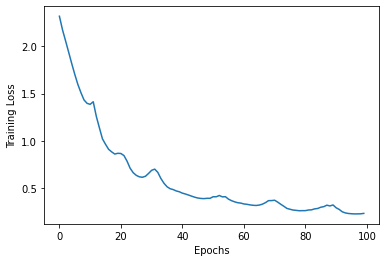

In [ ]:
plt.figure()
plt.plot(loss_history)
plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.show()

### Evaluation on test data [5 pts]

Now we will be evaluating the accuracy we get from the trained model. We feed training data and test data to the forward model along with the trained parameters. 

Note that, we need to convert the (probability) output of the forward pass into labels before evaluating accuracy. We can assign label based on the maximum probability. 

We assign estimated labels $$\hat{y}_i = \arg \max_c  \mathbf{p}_c $$ for every probility vector. 

In [ ]:
from numpy.ma.core import argmax
from numpy.ma.core import argmax
# TODO  

def accuracy(test_x, onehot_test_y, params):
    Y2, intermediate = forward(test_x , params)
    output = np.argmax(Y2,0)
    output_given = np.argmax(onehot_test_y,0)
    output == output_given
    acc = np.mean(output_given == output)*100
    return acc

print("Training accuracy:",accuracy(train_x, onehot_y, params))
print("Test accuracy:",accuracy(test_x, onehot_test_y, params))

Training accuracy: 94.26
Test accuracy: 91.4


### Visualize some of the correct/miscalassified images [optional]

Now we will look at some images from training and test sets that were misclassified. 

Training set. 
Pick example from each class that are correcly and incorreclty classified. 
True/False Positive/Negatives

Test set. 
Pick examples from each class that are correcly and incorreclty classified. 
True/False Positive/Negatives


In [ ]:
# TODO 
# Your code goes here ...




### Note about implementation

This is a note on two problems I have seen in the past and how they can be easily fixed. 

1. Summation along different axes ? 

2. Summation of gradients over samples ? 




**1. Summation to create probability vectors in the Softmax function**

Suppose X is a d x N array, in our case, it is 784 x 10000. 

`Z2 = W2 Y1 + b2  will be 10 x 10000 array `



`softmax(Z2)` will be a `10 x 10000` array in which we want to apply a softmax function on every column of `Z2` by first computing exponential and then normalizing the column to sum to 1, which is needed for it to be a probability vector. 




We can do that as 
```
probs = np.exp(Z2) 

# now you want to sum up each column and divide the column by the sum so that each column is a valid probability vector

probs /= np.sum(probs,axis=0,keepdims=True) # this makes sum of each column to 1
```

The **WRONG** thing to do is
```
probs /= np.sum(probs) 
# This is WRONG. np.sum() computes sum of the entire array. 
```



**2. Computing gradient for the entire loss function**

(this involves summation of N rank-one matrices in our notation.)




Suppose you have computed delta1, delta2 properly




Let's assume you computed
```
# delta2 is a 10 x 10000 array
# Y1 is a 256 x 10000 array
# N is 10000
# grad_W2 should be a 10 x 256 array
```



We can expand the formula for the gradient of the overall loss. 

$$\nabla_{W^{(2)}} Loss = \frac{1}{N}\sum_i \nabla_{W^{(2)}} Loss_i, $$ 

where 

$$\nabla_{W^{(2)}} Loss_i = \delta^{(2)} y^{(1)T}$$ is the gradient of the loss for $i$th training sample, where $\delta^{(2)}$ is a column of length 10 and $y^{(1)T}$ is a row of length 256, corresponding to $i$th training sample. Matrix product of column and row gives a a rank-1 matrix of size 10 x 256. 




To compute the gradient of loss over all the training samples, we need to average the rank-1 matrices for all N training samples.


We can write the code for that as 

```
# Sum gradient of loss for each sample
for i in range(N):
	grad_W2 += (1/N)*delta2[:,i,None].dot(Y1[:,i,None].T)

# OR we can compute grad_W2 without for loop as 
grad_W2 = 1/N*np.dot(delta2,Y1.T)
```

To see why this is true, you can convince yourself that matrix product of an `M x N` matrix with an `N x K` matrix can be written as a summation of N `M x K` rank-one matricess. 




Suppose 

$A = [\mathbf{a}_1 ~ \cdots ~ \mathbf{a}_N] \text{ and } B  = \begin{bmatrix} \mathbf{b}_1^T \\ \vdots \\ \mathbf{b}_N^T \end{bmatrix},$

where $\mathbf{a}_i, \mathbf{b}_i$ are columns of length $M, K$, respectively.  

 

We can write $AB$ as 




$$AB = \sum_{i = 1}^N \mathbf{a}_i \mathbf{b}_i^T.$$ 




 


---
## Submission instructions
1. Download this Colab to ipynb, and convert it to PDF. Follow similar steps as [here](https://stackoverflow.com/questions/53460051/convert-ipynb-notebook-to-html-in-google-colab) but convert to PDF.
 - Download your .ipynb file. You can do it using only Google Colab. `File` -> `Download` -> `Download .ipynb`
 - Reupload it so Colab can see it. Click on the `Files` icon on the far left to expand the side bar. You can directly drag the downloaded .ipynb file to the area. Or click `Upload to session storage` icon and then select & upload your .ipynb file.
 - Conversion using %%shell. 
 ```
!sudo apt-get update
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-generic-recommended
!jupyter nbconvert --log-level CRITICAL --to pdf name_of_hw.ipynb
  ```
 - Your PDF file is ready. Click 3 dots and `Download`.


  

2. Upload the PDF to Gradescope, select the correct pdf pages for each question. **Important!**

3. Upload the ipynb file to Gradescope


Notice:
In case of errors in conversion, please check your LaTeX and debug. In Markdown, when you write in LaTeX math mode, do not leave any leading and trailing whitespaces inside the dollar signs ($). For example, write `(dollarSign)\mathbf(dollarSign)(dollarSign)` instead of `(dollarSign)(space)\mathbf{w}(dollarSign)`. Otherwise, nbconvert will throw an error and the generated pdf will be incomplete. [This is a bug of nbconvert.](https://tex.stackexchange.com/questions/367176/jupyter-notebook-latex-conversion-fails-escaped-and-other-symbols)


In [ ]:
!sudo apt-get update
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-generic-recommended

Get:1 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease [1,581 B]
Hit:4 http://archive.ubuntu.com/ubuntu focal InRelease
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease [18.1 kB]
Get:6 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:7 http://security.ubuntu.com/ubuntu focal-security/universe amd64 Packages [1,017 kB]
Get:8 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [2,544 kB]
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  Packages [920 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Get:12 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:13 http://ppa.launchpad.net/graphi

In [ ]:
!jupyter nbconvert --log-level CRITICAL --to pdf fall2022_hw3.ipynb # make sure the ipynb name is correct

This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePr